# Prjoect 5 (Prject Dynamics M20)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\arkay\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Data Set Information-
This database contains 14 attributes . In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute)


In [2]:
data=pd.read_csv('heart.csv',na_values='?')
data

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
195,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
197,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


# EDA

In [3]:
df=pd.DataFrame(data=data)
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0


In [4]:
df1=df.copy()
#taking a copy of the dataset

In [5]:
df1.rename(columns={'63':'age','1':'sex','4':'cp','140':'trestbps','260':'chol','0':'fbs','1.1':'restecg','112':'thalach','1.2':'exang','3':'oldpeak','2':'slope','?':'ca','?.1':'thal','2.1':'disease'},inplace=True)
print(df1)
# setting up the header

     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     44    1   4     130.0  209.0  0.0        1    127.0    0.0      0.0   
1     60    1   4     132.0  218.0  0.0        1    140.0    1.0      1.5   
2     55    1   4     142.0  228.0  0.0        1    149.0    1.0      2.5   
3     66    1   3     110.0  213.0  1.0        2     99.0    1.0      1.3   
4     66    1   3     120.0    0.0  0.0        1    120.0    0.0     -0.5   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
194   54    0   4     127.0  333.0  1.0        1    154.0    0.0      0.0   
195   62    1   1       NaN  139.0  0.0        1      NaN    NaN      NaN   
196   55    1   4     122.0  223.0  1.0        1    100.0    0.0      0.0   
197   58    1   4       NaN  385.0  1.0        2      NaN    NaN      NaN   
198   62    1   2     120.0  254.0  0.0        2     93.0    1.0      0.0   

     slope  ca  thal  disease  
0      NaN NaN   NaN        0  
1      3.0 

In [6]:
df2=pd.DataFrame(data=df1)
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0


In [7]:
df2.info()
# dataset contains NaN values
# all attributes are numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       199 non-null    int64  
 1   sex       199 non-null    int64  
 2   cp        199 non-null    int64  
 3   trestbps  143 non-null    float64
 4   chol      192 non-null    float64
 5   fbs       192 non-null    float64
 6   restecg   199 non-null    int64  
 7   thalach   146 non-null    float64
 8   exang     146 non-null    float64
 9   oldpeak   143 non-null    float64
 10  slope     97 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  disease   199 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.9 KB


In [8]:
df2['ca'].isnull().sum()
# in this attribute 197 out of 199 entries are missing. we may just drop this column

197

In [9]:
df2['thal'].unique()

array([nan,  3.,  7.,  6.])

In [10]:
df2['chol']=df2['chol'].replace(np.NaN,df2['chol'].mean())
# replacing the NaN values with mean value

In [11]:
df2['fbs']=df2['fbs'].replace(np.NaN,df2['fbs'].mean())
# replacing the NaN values with mean value

In [12]:
df2['trestbps']=df2['trestbps'].replace(np.NaN,df2['trestbps'].mean())
# replacing the NaN values with mean value

In [13]:
df2['thalach']=df2['thalach'].replace(np.NaN,df2['thalach'].mean())
# replacing the NaN values with mean value

In [14]:
df2['exang']=df2['exang'].replace(np.NaN,df2['exang'].mean())
# replacing the NaN values with mean value

In [15]:
df2['oldpeak']=df2['oldpeak'].replace(np.NaN,df2['oldpeak'].mean())
# replacing the NaN values with mean value

In [16]:
df2['slope']=df2['slope'].replace(np.NaN,df2['slope'].mean())
# replacing the NaN values with mean value

In [17]:
df2['thal']=df2['thal'].replace(np.NaN,df2['thal'].mean())
# replacing the NaN values with mean value

In [18]:
df2['disease'].unique()
# This is the Target column. the out ranges from 0 to 4

array([0, 2, 1, 3, 4], dtype=int64)

In [19]:
df3=df2.drop('ca',axis=1)
df3.head()
# lets drop this column

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,disease
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.134021,6.294118,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.000000,6.294118,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.000000,6.294118,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.000000,6.294118,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.000000,6.294118,0


In [20]:
df3.info()
# dataset doesnt have any missing values now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       199 non-null    int64  
 1   sex       199 non-null    int64  
 2   cp        199 non-null    int64  
 3   trestbps  199 non-null    float64
 4   chol      199 non-null    float64
 5   fbs       199 non-null    float64
 6   restecg   199 non-null    int64  
 7   thalach   199 non-null    float64
 8   exang     199 non-null    float64
 9   oldpeak   199 non-null    float64
 10  slope     199 non-null    float64
 11  thal      199 non-null    float64
 12  disease   199 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 20.3 KB


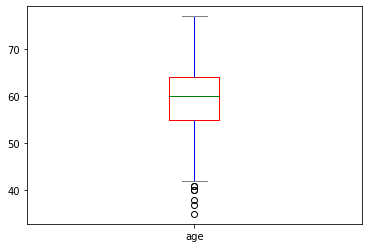

In [21]:
c={'boxes':'Red','whiskers':'Blue','medians':'Green','caps':'Grey'}
# fixing the color for boxplot
df3['age'].plot.box(color=c)

{'bodies': [<matplotlib.collections.PolyCollection at 0x130e6c69748>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x130e6cf1848>,
 'cmins': <matplotlib.collections.LineCollection at 0x130e6cff908>,
 'cbars': <matplotlib.collections.LineCollection at 0x130e6cffdc8>}

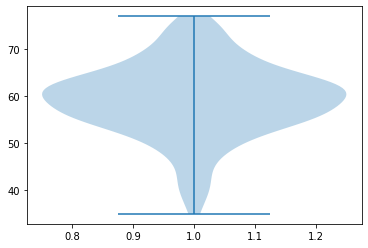

In [22]:
plt.violinplot(df3['age'])
# most of the people are around the age of 60 in this dataset

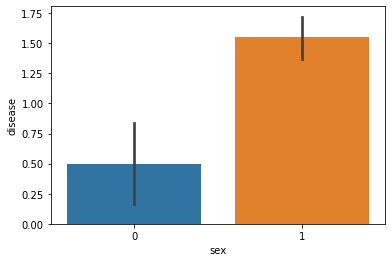

In [23]:
sns.barplot(x='sex',y='disease',data=df3)
# Male are prone to get this disease

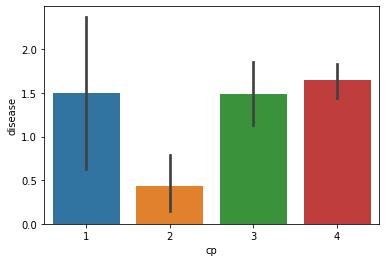

In [24]:
sns.barplot(x='cp',y='disease',data=df3)
# category 2 shows less chance of getting disease

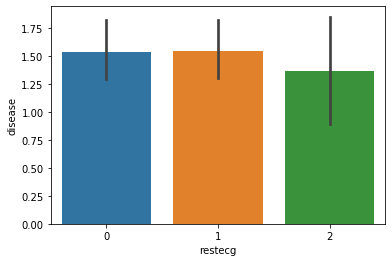

In [25]:
sns.barplot(x='restecg',y='disease',data=df3)

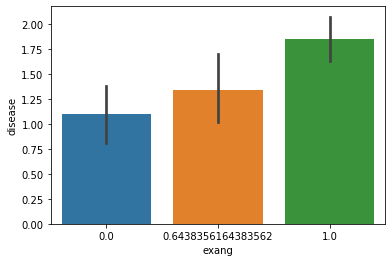

In [26]:
sns.barplot(x='exang',y='disease',data=df3)

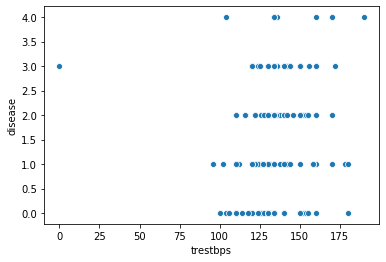

In [27]:
sns.scatterplot(data=df3,x='trestbps',y='disease')
# showing no realtion with target attribute

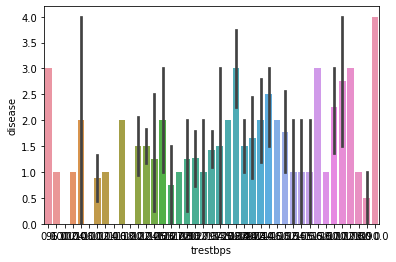

In [28]:
sns.barplot(x='trestbps',y='disease',data=df3)

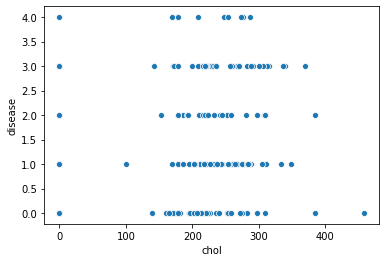

In [29]:
sns.scatterplot(data=df3,x='chol',y='disease')

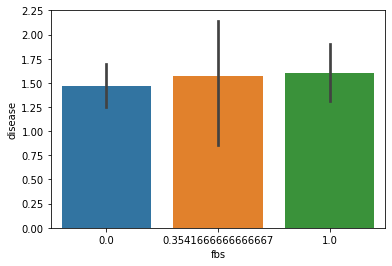

In [30]:
sns.barplot(x='fbs',y='disease',data=df3)

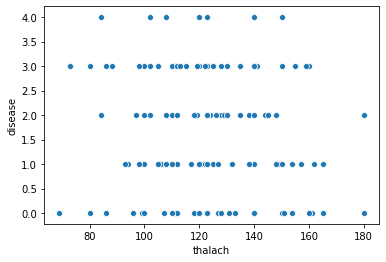

In [31]:
sns.scatterplot(data=df3,x='thalach',y='disease')

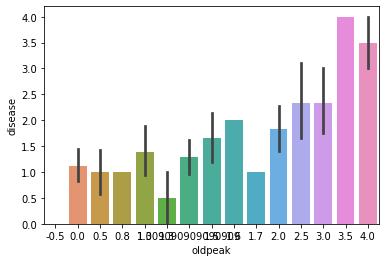

In [32]:
sns.barplot(x='oldpeak',y='disease',data=df3)

# Cleaning off the Dataset

In [33]:
z=np.abs(zscore(df3))
z

array([[1.96373685e+00, 1.76318130e-01, 6.25830650e-01, ...,
        9.52499786e-16, 0.00000000e+00, 1.24498245e+00],
       [8.56037368e-02, 1.76318130e-01, 6.25830650e-01, ...,
        1.85738621e+00, 0.00000000e+00, 3.95756011e-01],
       [5.54815197e-01, 1.76318130e-01, 6.25830650e-01, ...,
        2.43229147e+00, 0.00000000e+00, 4.24613220e-01],
       ...,
       [5.54815197e-01, 1.76318130e-01, 6.25830650e-01, ...,
        9.52499786e-16, 5.59157504e-01, 3.95756011e-01],
       [1.70563837e-01, 1.76318130e-01, 6.25830650e-01, ...,
        9.52499786e-16, 0.00000000e+00, 1.24498245e+00],
       [3.41771310e-01, 1.76318130e-01, 1.89013499e+00, ...,
        9.52499786e-16, 0.00000000e+00, 4.24613220e-01]])

In [34]:
print(np.where(z>3))

(array([ 11,  23,  32,  50,  65,  69,  71,  75,  78,  95,  96, 125, 127,
       130, 132, 136, 170, 175, 188, 189, 193, 194, 195], dtype=int64), array([11,  7,  3,  1,  2,  7,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2, 11,
        3, 11,  1, 11,  1,  2], dtype=int64))


In [35]:
df3n=df3[(z<3).all(axis=1)]
df3n.shape

(176, 13)

In [36]:
df3n.skew()
# checking the skewness

age        -0.251048
sex         0.000000
cp         -1.430386
trestbps    0.516733
chol       -0.527914
fbs         0.677032
restecg     0.371980
thalach    -0.117434
exang      -0.814084
oldpeak     0.443474
slope      -0.180404
thal        2.070484
disease     0.265142
dtype: float64

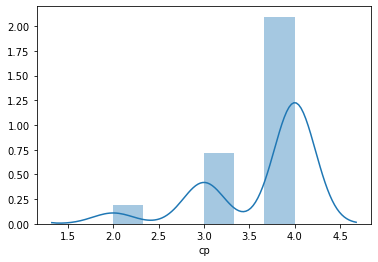

In [37]:
sns.distplot(df3n['cp'])

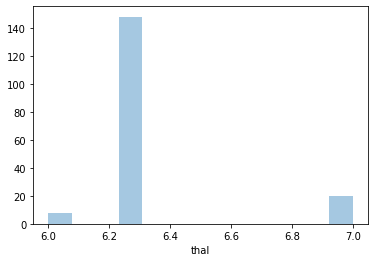

In [38]:
sns.distplot(df3n['thal'],kde=False)

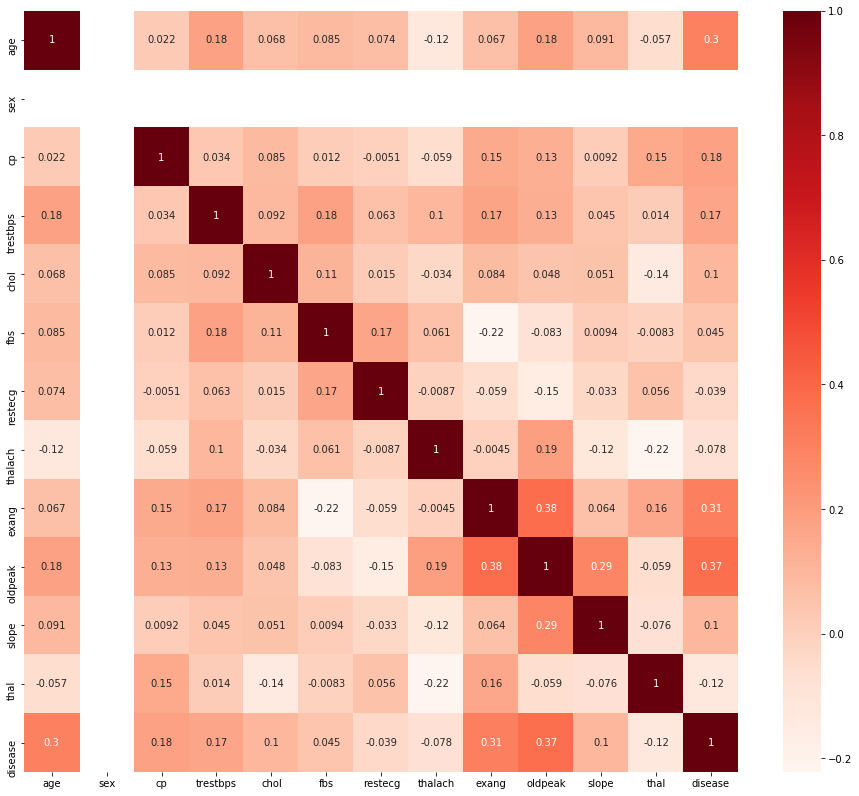

In [39]:
plt.figure(figsize=(16,14))
sns.heatmap(df3n.corr(),cmap='Reds',annot=True)
# Checking co-relation between all the attributes.
# the target attribute is negatively corelated with 'restecg' & 'thalach'. Other columns are positively related 

# Data Pre Processing & Model Training 

In [41]:
x=df3n.iloc[:,0:-1]
y=df3n.iloc[:,-1]

In [42]:
scale=StandardScaler()
# stndard scalling in order to train the model better 

In [43]:
x=scale.fit_transform(x)

In [44]:
m=MinMaxScaler()
# standarising in order scale the negative entries in any feature attributes. 

In [45]:
x=m.fit_transform(x)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=65)

In [47]:
model= [DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB()]

In [48]:
for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    Pred=i.predict(x_test)
    AS=accuracy_score(y_test,Pred)
    cvs=cross_val_score(i,x,y,cv=15,scoring='accuracy').mean()
    print('accuracy score of',i,'is:',AS)
    print(AS)
    print(confusion_matrix(y_test,Pred))
    print(classification_report(y_test,Pred))
    print(cvs)
    print('\n')

accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 0.2830188679245283
0.2830188679245283
[[6 3 2 0 0]
 [4 5 3 2 0]
 [3 4 2 0 0]
 [2 3 8 2 0]
 [1 0 3 0 0]]
              precision    recall  f1-score   support

           0       0.38      0.55      0.44        11
           1       0.33      0.36      0.34        14
           2       0.11      0.22      0.15         9
           3       0.50      0.13      0.21        15
           4       0.00      0.00      0.00         4

    accuracy                           0.28        53
   macro avg       0.26      0.25      0.23        53
weighted avg 

#As we can see, none of the above used algorithms are giving good enough scores. 

In [49]:
# lets try to find the best hyper parameter in order to tune the model
dtc=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.3326388888888888
{'criterion': 'entropy'}


In [50]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
# score is still not good enough 

0.22641509433962265
              precision    recall  f1-score   support

           0       0.32      0.55      0.40        11
           1       0.15      0.14      0.15        14
           2       0.13      0.22      0.17         9
           3       0.33      0.13      0.19        15
           4       0.00      0.00      0.00         4

    accuracy                           0.23        53
   macro avg       0.19      0.21      0.18        53
weighted avg       0.22      0.23      0.20        53



In [52]:
svc=svm.SVC()

In [53]:
param_grid={'kernel':['poly','rbf','linear']}
grid=GridSearchCV(svc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.3979166666666666
{'kernel': 'rbf'}


In [54]:
svc=svm.SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [55]:
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
# score is still not good enough 

0.37735849056603776
              precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.35      0.50      0.41        14
           2       0.20      0.33      0.25         9
           3       1.00      0.07      0.12        15
           4       0.00      0.00      0.00         4

    accuracy                           0.38        53
   macro avg       0.42      0.34      0.29        53
weighted avg       0.52      0.38      0.32        53



In [56]:
# Lets try to boost the scoring
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
predrf=rf.predict(x_test)
rf.score(x_train,y_train)
# So lets settle with this 

1.0

In [58]:
predrf

array([0, 1, 0, 3, 0, 1, 2, 1, 2, 3, 0, 1, 1, 2, 2, 0, 1, 3, 1, 2, 3, 1,
       3, 3, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0,
       1, 2, 0, 1, 0, 0, 2, 2, 2], dtype=int64)

In [59]:
joblib.dump(rf,'rfheart.obj')

['rfheart.obj']